In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Input
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout

In [ ]:
data = pd.read_csv('datos_Norte_no_norm.csv')
data.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,SO2,SR,TOUT,WSR,WDV
0,7.46,0.1304,0.0432,0.1735,0.012,522.0,369.16,715.7,76.5,0.0042,0.0,17.05,3.8,18.0
1,4.16,0.0562,0.0411,0.0972,0.009,712.0,299.29,715.5,79.0,0.0040,0.0,15.87,4.5,15.0
2,3.19,0.0424,0.0379,0.0802,0.007,586.0,201.58,715.1,77.7,0.0038,0.0,15.41,4.8,28.0
3,3.10,0.0461,0.0349,0.0809,0.007,406.0,186.32,714.9,77.6,0.0037,0.0,14.58,2.8,26.0
4,3.20,0.0592,0.0335,0.0927,0.007,340.0,168.50,714.9,77.6,0.0038,0.0,13.84,4.1,28.0


In [ ]:
X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV']]
y = data[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2']]

print(X.shape, y.shape)

(13870, 6) (13870, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled.shape

(13870, 6)

In [ ]:
X = X_scaled

In [ ]:
(X.shape,y.shape)

((13870, 6), (13870, 8))

In [ ]:
model = Sequential()
model.add(Input(shape=(6,)))
model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8))
model.compile(loss='mae', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,496 (44.91 KB)

 Trainable params: 11,496 (44.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)

In [ ]:
y_test

,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2
11096,0.420000,0.003100,0.004800,0.007900,0.03900,83.000000,19.000000,0.003000
11097,0.400000,0.002600,0.003600,0.006300,0.04700,195.000000,17.000000,0.002800
11098,0.380000,0.002600,0.003500,0.006200,0.04800,203.000000,17.000000,0.002600
11099,0.390000,0.002800,0.003900,0.006700,0.04600,185.000000,19.800000,0.002600
11100,0.410000,0.002800,0.003800,0.006500,0.04800,146.000000,16.000000,0.002600
...,...,...,...,...,...,...,...,...
13865,0.770000,0.002000,0.004900,0.006900,0.02000,87.000000,21.000000,0.002800
13866,0.790000,0.002000,0.005700,0.007800,0.01800,82.000000,23.000000,0.002800
13867,0.780000,0.002200,0.007000,0.009200,0.01200,96.000000,24.000000,0.002600
13868,0.622067,0.012101,0.015323,0.027343,0.02758,63.419949,16.982506,0.003101


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.4371 - val_loss: 6.4483
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4453 - val_loss: 6.3421
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1092 - val_loss: 6.3092
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1320 - val_loss: 6.2803
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8356 - val_loss: 6.3827
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7622 - val_loss: 6.3249
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7178 - val_loss: 6.3260
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5833 - val_loss: 6.2803
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5449 - val_loss: 6.3356
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4744 - val_loss: 6.3427
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4409 - val_loss: 6.2693
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model.evaluate(X_test,y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9428


3.7163021564483643

In [ ]:
y_pred=model.predict(X_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
df_real = pd.DataFrame(y_test,columns=y.columns)
df_real

,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2
11096,0.420000,0.003100,0.004800,0.007900,0.03900,83.000000,19.000000,0.003000
11097,0.400000,0.002600,0.003600,0.006300,0.04700,195.000000,17.000000,0.002800
11098,0.380000,0.002600,0.003500,0.006200,0.04800,203.000000,17.000000,0.002600
11099,0.390000,0.002800,0.003900,0.006700,0.04600,185.000000,19.800000,0.002600
11100,0.410000,0.002800,0.003800,0.006500,0.04800,146.000000,16.000000,0.002600
...,...,...,...,...,...,...,...,...
13865,0.770000,0.002000,0.004900,0.006900,0.02000,87.000000,21.000000,0.002800
13866,0.790000,0.002000,0.005700,0.007800,0.01800,82.000000,23.000000,0.002800
13867,0.780000,0.002200,0.007000,0.009200,0.01200,96.000000,24.000000,0.002600
13868,0.622067,0.012101,0.015323,0.027343,0.02758,63.419949,16.982506,0.003101


In [ ]:
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)
df_prediccion

,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2
11096,0.238091,-0.098120,-0.010554,0.172179,0.115122,78.027473,8.401744,-0.020181
11097,0.357328,-0.148299,-0.059897,0.280612,-0.006901,92.406151,8.968335,-0.114958
11098,0.320415,-0.080647,-0.069120,0.232173,-0.018444,93.412209,9.766671,0.005427
11099,0.249575,-0.093042,-0.049628,0.211368,-0.019708,85.203850,10.997721,-0.025249
11100,0.249677,-0.095864,-0.047279,0.192805,-0.010808,80.974632,10.277339,-0.010976
...,...,...,...,...,...,...,...,...
13865,0.729156,0.006843,-0.001963,0.051480,0.043077,58.833134,10.256801,-0.013970
13866,0.708391,0.019962,0.010623,0.012804,0.031847,57.077473,9.624259,0.001582
13867,0.641703,0.026469,-0.000849,-0.024810,0.021913,51.088673,9.092713,0.004600
13868,0.620740,0.019561,0.018250,-0.000458,0.045353,64.174461,14.747525,-0.006116


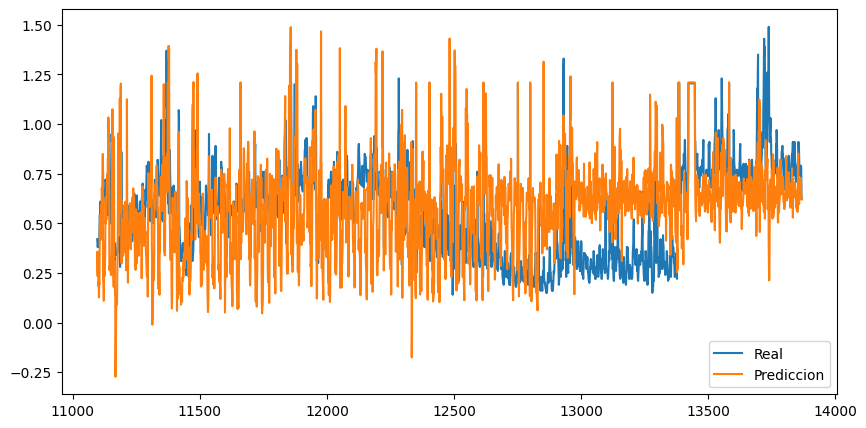

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_real['CO'])
plt.plot(df_prediccion['CO'])
plt.legend(['Real','Prediccion'])
plt.show()

# Segundo Modelo

In [ ]:
model = Sequential()
model.add(Input(shape=(6,)))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.0001))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.2505 - val_loss: 13.2088
Epoch 2/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7121 - val_loss: 12.6405
Epoch 3/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.0009 - val_loss: 11.8603
Epoch 4/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6761 - val_loss: 10.9674
Epoch 5/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.7578 - val_loss: 10.0825
Epoch 6/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0494 - val_loss: 9.2421
Epoch 7/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3240 - val_loss: 8.4186
Epoch 8/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7469 - val_loss: 7.7241
Epoch 9/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5015 - val_loss: 7.2295
Epoch 10/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2627 - val_loss: 6.9004
Epoch 11/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0224 - val_loss: 6.7063
Epoch 12/100
278/278 ━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test,y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9601


3.9100632667541504

In [ ]:
y_pred=model.predict(X_test)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


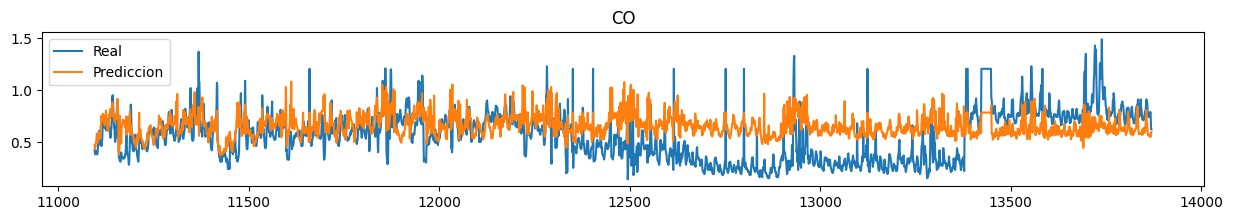

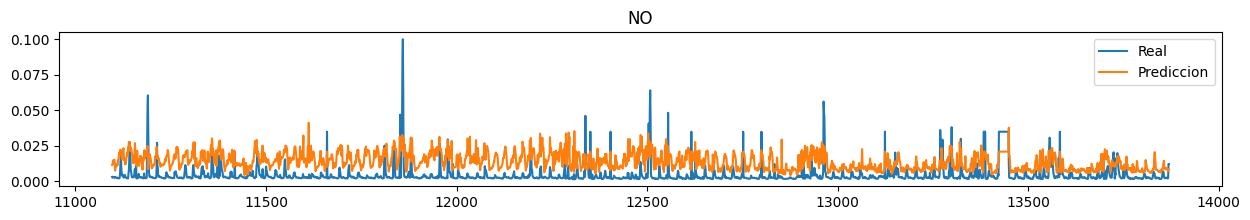

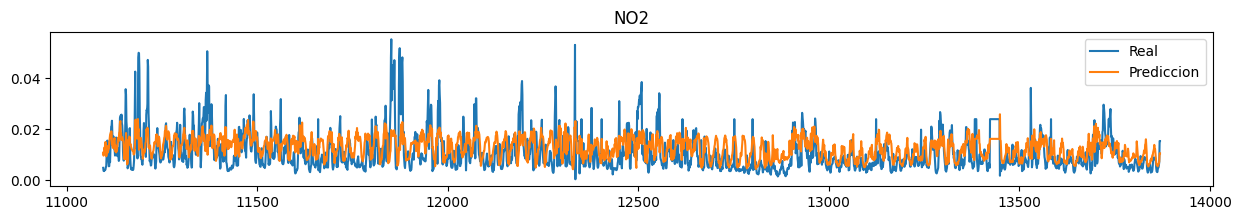

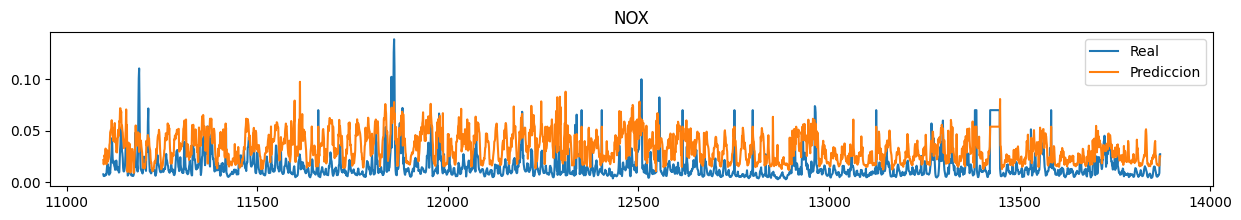

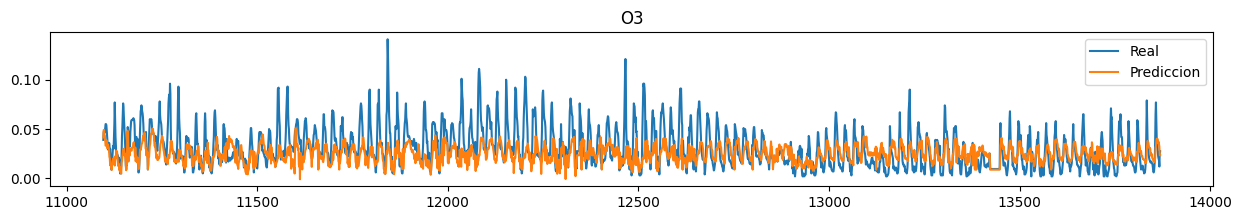

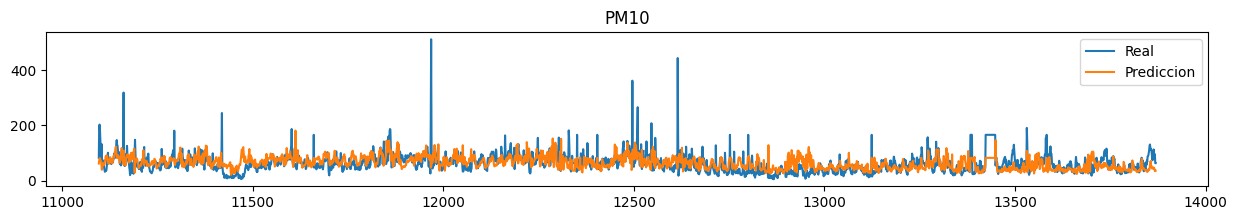

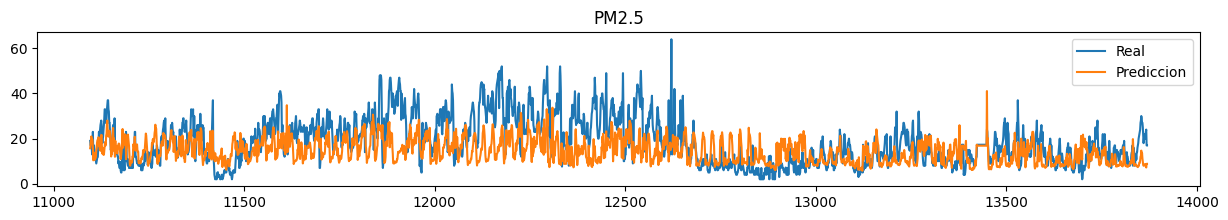

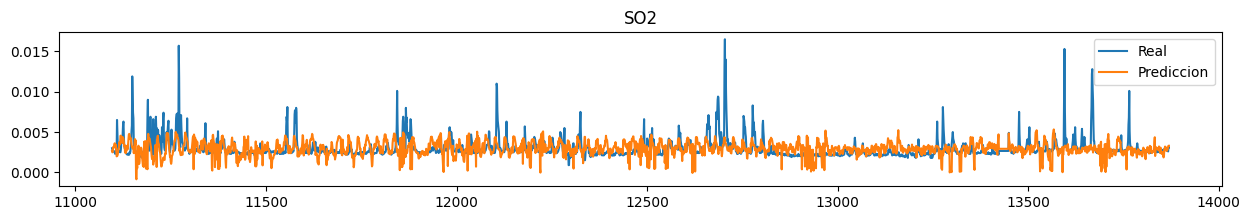

In [ ]:

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()


# Tercer modelo

In [ ]:
model = Sequential()
model.add(Input(shape=(6,)))
model.add(Dense(80, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.0001))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

In [ ]:
model.evaluate(X_test,y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9604


3.863666296005249

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=200,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.6046 - val_loss: 13.5140
Epoch 2/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9781 - val_loss: 12.9310
Epoch 3/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2348 - val_loss: 12.2419
Epoch 4/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7515 - val_loss: 11.4349
Epoch 5/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1414 - val_loss: 10.5864
Epoch 6/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5077 - val_loss: 9.7918
Epoch 7/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8946 - val_loss: 9.0841
Epoch 8/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3582 - val_loss: 8.4588
Epoch 9/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9567 - val_loss: 7.9294
Epoch 10/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5963 - val_loss: 7.5014
Epoch 11/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4315 - val_loss: 7.1566
Epoch 12/200
139/139 ━━━━━━━━━━━━━━

In [ ]:
y_pred=model.predict(X_test)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


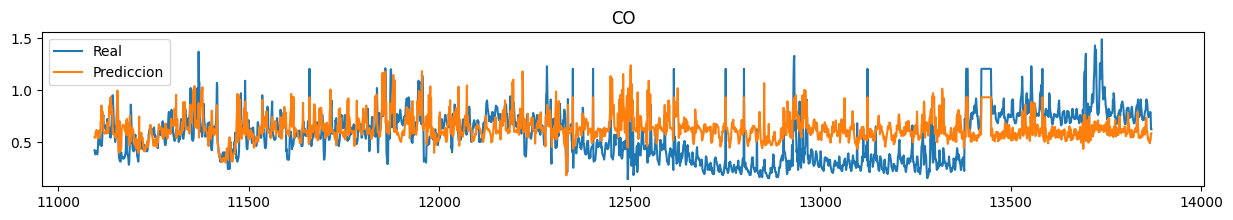

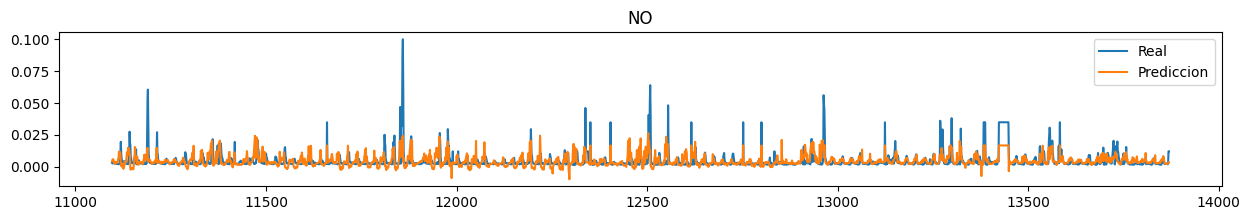

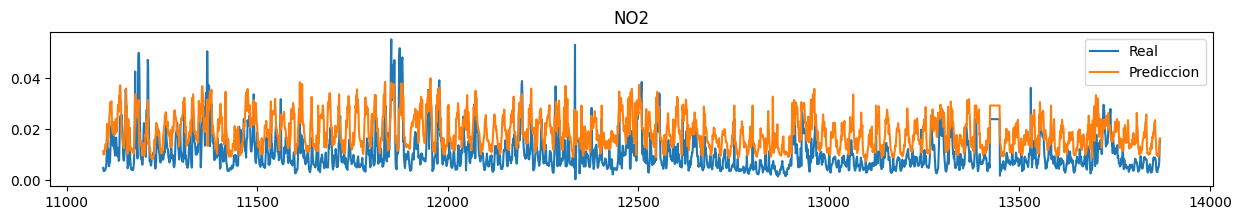

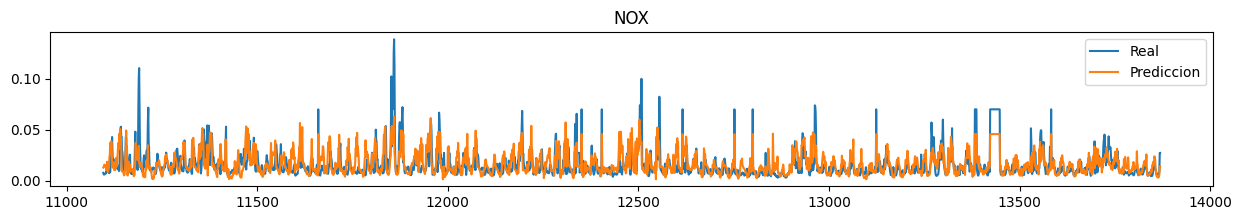

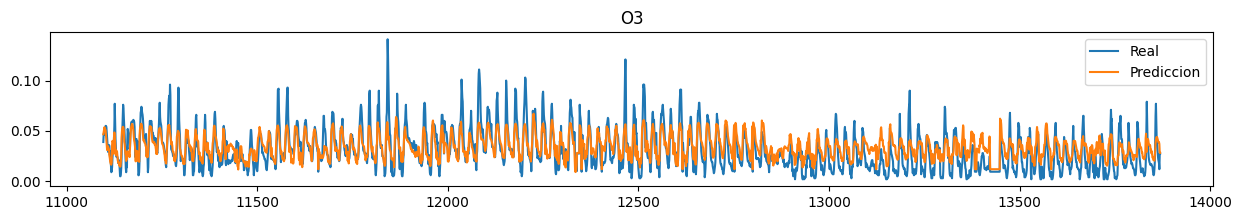

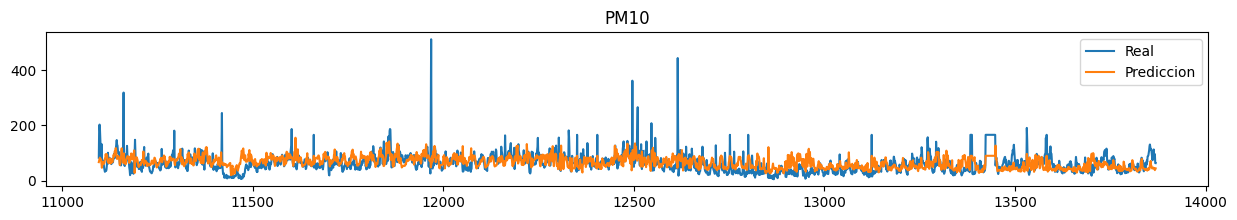

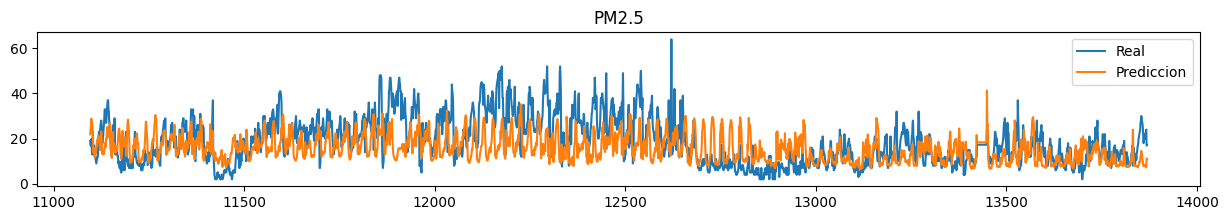

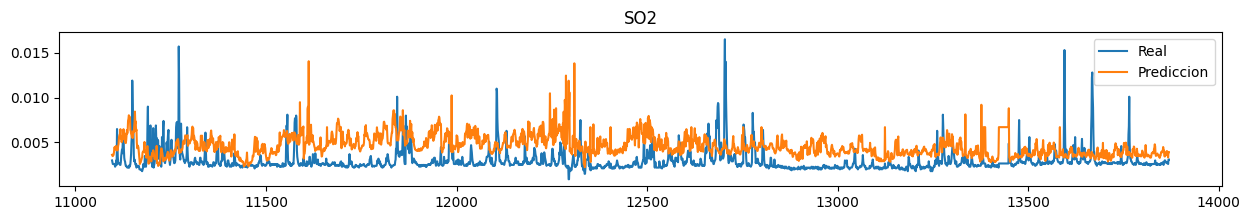

In [ ]:
for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()